## 決定木スクラッチ

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import numpy as np

### 完成したコード

In [3]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
      
    Attributes
    ----------
    self.left_label_  
    　　左ノードのラベル
    self.right_label_  
    　　右ノードのラベル
    self.threshold_ 
    　　しきい値
    self.root_gini_
    　　ルートのジニ不純率
    self.root_0_
    　　ルートのラベル０の数
    self.root_1_
    　　ルートのラベル１の数
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
        
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        
        #　【親ノード】
        # 情報利得が最大になる分割（各ラベルのインデックス）
        root_index_0 = np.where(y == 0)[0]
        root_index_1 = np.where(y == 1)[0]
        
        
        # 情報利得が最大になる分割（各ラベルのサンプル数）
        root_0 = root_index_0.shape[0]
        root_1 = root_index_1.shape[0]
        
        # ジニ不純度
        root_Nt = np.array([root_0, root_1])
        root_gini = self.gini_impurity(root_Nt)
        
        # クラス変数として格納
        self.root_gini_ = root_gini
        self.root_0_ = root_0
        self.root_1_ = root_1
        
        
        #　　【子ノード】
        # 情報利得が最大になる分割（各ラベルのインデックス）
        
        # 特徴量を選択する　X[:, 0] or X[:, 1] 
        #left_index, right_index, threshold = self.split_sample(X[:, 0], y)
        left_index, right_index, threshold = self.split_sample(X[:, 1], y)
        
        print("左右のインデックス数")
        print("左に分類：{}".format(left_index.shape))
        print("右に分類：{}".format(right_index.shape))
        
        # 情報利得が最大になる分割（各ラベルのサンプル数）
        left_0 = np.count_nonzero(y[left_index] == 0)
        left_1 = np.count_nonzero(y[left_index] == 1)
        right_0 = np.count_nonzero(y[right_index] == 0)
        right_1 = np.count_nonzero(y[right_index] == 1)
        
        print("選んだ数")
        print("左のラベル０：{}".format(left_0))
        print("左のラベル１：{}".format(left_1))
        print("右のラベル０：{}".format(right_0))
        print("右のラベル１：{}".format(right_1))
        
    
        # ジニ不純度
        left_Nt = np.array([left_0, left_1])
        left_gini = self.gini_impurity(left_Nt)
        
        right_Nt = np.array([right_0, right_1])
        right_gini = self.gini_impurity(right_Nt)
        
        
        # 情報利得
        ig = self.information_gain(root_0, root_1, left_0, left_1, right_0, right_1)
        print("情報利得：{}".format(ig))
        
        
        # 閾値をクラス変数として保管
        self.threshold_ = threshold
        print("しきい値：{}".format(self.threshold_))
        
        
        #　　葉ノードのラベルを決定
        
        # ジニ不純度０はどちらかが０
        if left_gini == 0:
            if left_0 is not 0:
                left_label = 0 
            else:
                left_label = 1
        # ジニ不純度が０ではないとき多数決
        elif left_0 >= left_1:
            left_label = 0
        else:
            left_label = 1
            
        # ジニ不純度０はどちらかが０
        if right_gini == 0:
            if right_0 is not 0:
                right_label = 0 
            else:
                right_label = 1
        # ジニ不純度が０ではないとき多数決
        elif right_0 >= right_1:
            right_label = 0
        else:
            right_label = 1
            
            
        # 推定用のノードラベルをクラス変数として保管
        self.left_label_ = left_label
        print("左ノードのラベル：{}".format(self.left_label_))
            
        # 推定用のノードラベルをクラス変数として保管
        self.right_label_ = right_label
        print("右ノードのラベル：{}".format(self.right_label_))         
        
        
    
    def split_sample(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        X=X.reshape(-1,1)
        
        # サンプル数
        t_all = X.shape[0]
        
        # 各しきい値のジニ不純度保管用
        info_gain_ndarray = np.zeros(t_all)
        
        # 各特徴量の値自体をしきい値にしてジニ不純度を計算
        for i in range(t_all):
            # 閾値より高いインデックス を返す
            excess_index = np.where(X[:,0] > X[i,0])[0]
            below_index = np.where(X[:,0] <= X[i,0])[0]
            
            # 分割後の各ラベルのサンプル数
            exceed_0 = np.count_nonzero(y[excess_index] == 0)
            exceed_1 = np.count_nonzero(y[excess_index] == 1)
            
            below_0 = np.count_nonzero(y[below_index] == 0)
            below_1 = np.count_nonzero(y[below_index] == 1)
            
            # ジニ不純度（分割の基準にするため）
            exceed_Nt = np.array([exceed_0, exceed_1])
            exceed_gini = self.gini_impurity(exceed_Nt)
            below_Nt = np.array([below_0, below_1])
            below_gini = self.gini_impurity(below_Nt)
            
            # 情報利得（分割の基準にするため）
            info_gain = self.information_gain(self.root_0_, self.root_1_, exceed_0, exceed_1, below_0, below_1)
            info_gain_ndarray[i] = info_gain
        
        # 最大情報利得
        best_gain = np.nanmax(info_gain_ndarray)
        
        # 情報利得が最大になる閾値を保管（argmaxだとnanが最大）
        threshold = X[np.nanargmax(info_gain_ndarray), 0]
        print("情報利得リスト：\n{}".format(info_gain_ndarray))
        print("情報利得 最大値：{}".format(best_gain))
        
        # 情報利得が最大の時のインデックスを取得
        best_index_l = np.where(X[:,0] > threshold)[0]
        best_index_r = np.where(X[:,0] <= threshold)[0]
        
        # 情報利得は返さず、別途計算
        return best_index_l, best_index_r, threshold

        
    def gini_impurity(self, Nt):
        """
        ジニ不純度
        """
        #ラベル数（Xの要素数で置き換えて算出）
        K = Nt.shape[0]
        
        # トータルサンプル数
        Nt_all = np.sum(Nt)
        
        # ジニ不純度
        #i_t = 1 - ((nt_0/nt_all)**2 + (nt_1/nt_all)**2)
        sigma = 0
        for k in range(K):
            sigma += (Nt[k]/Nt_all)**2
        i_t = 1 - sigma
        
        return i_t

    
    def information_gain(self, root_0, root_1, left_0, left_1, right_0, right_1):
        """
        情報利得
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        sample = root_0 + root_1
        
        # ジニ不純度
        root_gini = self.gini_impurity(np.array([root_0, root_1]))
        left_gini = self.gini_impurity(np.array([left_0, left_1]))
        right_gini = self.gini_impurity(np.array([right_0, right_1]))
        
        # 情報利得
        information_gain = root_gini - (((left_0 + left_1)/sample )*left_gini ) - (((right_0 + right_1)/sample)*right_gini)
        
        return information_gain
        
    
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        # サンプル数
        s_t = X.shape[0]
        
        # ラベル用の配列
        pred = np.zeros(s_t)
        
        for i in range(s_t):
            # 特徴量を選択する　X[:, 0] or X[:, 1] 
            #if X[i, 0] > self.threshold_:
            if X[i, 1] > self.threshold_:
                predict = self.left_label_
            else:
                predict = self.right_label_  
            pred[i] = predict
        
        return pred
    

## 【問題1】不純度を求める関数  

>ノード の ジニ不純度 を計算する関数を作成してください。ノード $t$ に対するジニ不純度 $I(t)$ は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。
>
>$
I(t) = 1-\sum_{i=1}^{K}P^2(C_i|t) = 1-\sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^{2}
$
>
>$t$ : ノードのインデックス  
>$i$ : クラスのインデックス  
>$K$ : クラスの数  
>$C_i$ : i番目のクラス  
>$P(C_i|t)$ :　t番目のノードにおける$C_i$の割合  
>$N_{t,i}$ : t番目のノードのi番目のクラスに属するサンプル数  
>$N_{t,all}$ : t番目のノードのサンプルの総数  
>
>まずは簡単な例を作り、手計算と関数の結果を比較してください。  
>
>《例》  
>クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500  
>クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度  0.667
>クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480  
>クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000  


In [4]:
# インスタンス化 
tree_q1 = ScratchDecesionTreeClassifierDepth1()

In [5]:
# サンプル数
#クラス1:サンプル数15,
#クラス2:サンプル数15
#→ ジニ不純度0.500
c1_sample = 15
c2_sample = 15

Nt = np.array([c1_sample, c2_sample])

ig_1= tree_q1.gini_impurity(Nt)


# サンプル数
#クラス1:サンプル数15,
#クラス2:サンプル数15
#クラス3:サンプル数15
#→ ジニ不純度0.667
c1_sample = 15
c2_sample = 15
c3_sample = 15

Nt = np.array([c1_sample, c2_sample, c3_sample])

ig_2= tree_q1.gini_impurity(Nt)


# サンプル数
#クラス1:サンプル数15,
#クラス2:サンプル数15
#→ ジニ不純度0.480
c1_sample = 18
c2_sample = 12

Nt = np.array([c1_sample, c2_sample])

ig_3= tree_q1.gini_impurity(Nt)

# サンプル数
#クラス1:サンプル数15,
#クラス2:サンプル数15
#→ ジニ不純度0.000
c1_sample = 30
c2_sample = 0

Nt = np.array([c1_sample, c2_sample])

ig_4= tree_q1.gini_impurity(Nt)

print(ig_1)
print(ig_2)
print(ig_3)
print(ig_4)

0.5
0.6666666666666667
0.48
0.0


## 【問題2】情報利得を求める関数  
>次に、ノード間の 情報利得 を計算する関数を作成してください。  
>問題1で作成したジニ不純度 I(t) を計算する関数を呼び出して使います。  
>情報利得IGは以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。
>
>ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。

In [6]:
#左ノードクラス1:サンプル数10, 
#左ノードクラス2:サンプル数30, 
#右ノードクラス1:サンプル数20, 
#右ノードクラス2:サンプル数5
#→ 情報利得0.143

p= np.array([30, 35])
c1= np.array([10, 30])
c2= np.array([20, 5])

i_g = tree_q1.information_gain(p[0], p[1], c1[0], c1[1], c2[0], c2[1])
print(i_g)

0.14319526627218937


## 【問題3】学習  
>空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。
>
>訓練データに対して全ての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。
>
>クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。
>
>《組み合わせの取り方》
>
>全ての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。片側の端は今回のスクラッチはこの方法で行なってください。
>他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。
>
>《補足》
>
>問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 I(p)
 は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# scikit-learn から　iris データセットを読み込む
from sklearn.datasets import load_iris

# iris データセットを変数に格納する
data = load_iris()

# 行と列のインデックス用のリストを用意
iris_data_columns=['sepal_length', 'sepal_width','petal_length','petal_width']
iris_target_columns=['Species',]

# pandas のデータフレームにする
X_data = pd.DataFrame(data=data['data'], columns=iris_data_columns)
y_data = pd.DataFrame(data=data['target'], columns=iris_target_columns)

# Xとyを列方向に結合
df = pd.concat([X_data, y_data], axis=1)

# 条件に従って抜き出し
df_ex = df[df['Species'] >=1]

# 処理用
#X_iris = np.array(df_ex[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
#y_iris = np.array(df_ex['Species']) - 1#　0,1にしたいので

X_iris = np.array(df_ex[['petal_length', 'petal_width']])
y_iris = np.array(df_ex['Species']) - 1#　0,1にしたいので


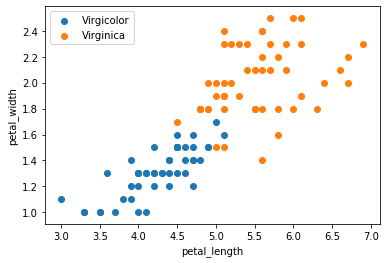

In [9]:
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X_iris[y_iris == 0, 0], X_iris[y_iris == 0, 1], label="Virgicolor")
plt.scatter(X_iris[y_iris == 1, 0], X_iris[y_iris == 1, 1], label="Virginica")
plt.legend()

In [10]:
# 学習データとテストデータを７５：２５で分割
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=0)


In [11]:
# インスタンス化 
tree_iris = ScratchDecesionTreeClassifierDepth1()
tree_iris.fit(X_train_iris, y_train_iris)

情報利得リスト：
[0.04054054 0.09701493 0.21428571 0.13492063 0.09701493 0.05555556
 0.36215539 0.25471698 0.07971014 0.25471698 0.13492063 0.20175439
 0.01948052 0.03333333 0.20175439 0.36489899 0.34052533 0.36489899
 0.13492063 0.09701493 0.34052533 0.20175439 0.09701493 0.26133333
 0.34052533 0.26133333 0.04054054 0.09701493 0.21428571 0.21428571
 0.03333333        nan 0.26133333 0.34052533 0.34052533        nan
 0.34052533 0.36215539 0.09701493 0.09701493 0.04054054 0.04054054
 0.25471698 0.25471698 0.36215539 0.03333333 0.09701493 0.26133333
 0.21428571 0.09701493 0.05555556 0.04054054 0.21428571 0.13492063
 0.03333333 0.34052533 0.25471698        nan 0.13492063 0.25471698
 0.26133333 0.21428571 0.13492063 0.21428571 0.21428571 0.03333333
 0.25471698 0.04054054 0.25471698 0.03333333 0.25471698 0.34052533
 0.21428571 0.34052533 0.26133333 0.20175439 0.07971014 0.01948052
 0.21428571 0.21428571]
情報利得 最大値：0.36489898989898983
左右のインデックス数
左に分類：(36,)
右に分類：(44,)
選んだ数
左のラベル０：1
左のラベル１：35
右のラベル０：39


/Users/ishiitomoaki/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:214: RuntimeWarning: invalid value encountered in long_scalars


## 【問題4】推定  
>推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。
>
>入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。



【考え方】  
同じ関数にテストデータを入れるとテストデータで閾値を学習してしまうため、閾値を固定した状態で同じロジックのプログラムを作成。

In [12]:
y_pred_iris = tree_iris.predict(X_test_iris)
print("自作関数による予測値\n{}".format(y_pred_iris))

自作関数による予測値
[0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
# scikt-learnによる分類と予測
tree_iris_sk = DecisionTreeClassifier(max_depth=1)
tree_iris_sk.fit(X_train_iris, y_train_iris)
y_pred_iris_sk = tree_iris_sk.predict(X_test_iris)
print("scikt-learnによる予測値\n{}".format(y_pred_iris_sk))

scikt-learnによる予測値
[1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]


## 【問題5】学習と推定  

>機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。
>
>scikit-learnによる実装と比べ、正しく動いているかを確認してください。
>
>AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。



In [15]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


# 処理用
X_ds2 = X
y_ds2 = y

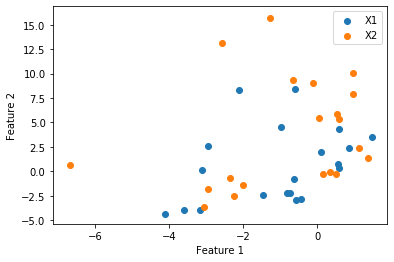

In [16]:
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X_ds2[y_ds2 == 0, 0], X_ds2[y_ds2 == 0, 1], label="X1")
plt.scatter(X_ds2[y_ds2 == 1, 0], X_ds2[y_ds2 == 1, 1], label="X2")
plt.legend()

In [17]:
# 学習データとテストデータを７５：２５で分割
X_train_ds2, X_test_ds2, y_train_ds2, y_test_ds2 = train_test_split(X_ds2, y_ds2, test_size=0.2, random_state=0)

print("X_trainの形は：{}".format(X_train_ds2.shape))
print("y_trainの形は：{}".format(y_train_ds2.shape))
print("X_testの形は：{}".format(X_test_ds2.shape))
print("y_testの形は：{}".format(y_test_ds2.shape))

X_trainの形は：(32, 2)
y_trainの形は：(32,)
X_testの形は：(8, 2)
y_testの形は：(8,)


In [18]:
# インスタンス化 
tree = ScratchDecesionTreeClassifierDepth1()
tree.fit(X_train_ds2, y_train_ds2)

情報利得リスト：
[0.05128205 0.02571429 0.03636364 0.03333333 0.07142857 0.05060729
 0.04166667 0.05172414 0.01764706 0.03125    0.03333333 0.05411255
 0.05411255 0.05172414 0.08181818 0.03333333 0.01785714 0.09259259
 0.01821862 0.04166667 0.02571429 0.01764706 0.06038647 0.03333333
 0.03174603        nan 0.00793651 0.01612903 0.06038647 0.01612903
 0.03333333 0.05128205]
情報利得 最大値：0.0925925925925925
左右のインデックス数
左に分類：(5,)
右に分類：(27,)
選んだ数
左のラベル０：0
左のラベル１：5
右のラベル０：16
右のラベル１：11
情報利得：0.0925925925925925
しきい値：8.4636
左ノードのラベル：1
右ノードのラベル：0


/Users/ishiitomoaki/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:214: RuntimeWarning: invalid value encountered in long_scalars


In [19]:
y_pred_ds2 = tree.predict(X_test_ds2)
print("自作関数による予測値\n{}".format(y_pred_ds2))

自作関数による予測値
[0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd

In [21]:
# 精度をまとめるための空のリストを用意
verification_tree = ['My_DecisionTree']

#Accuracy（正解率）
verification_tree.append(accuracy_score(y_test_ds2, y_pred_ds2))

#Precision（適合率）
verification_tree.append(precision_score(y_test_ds2, y_pred_ds2))

#Recall（再現率）
verification_tree.append(recall_score(y_test_ds2, y_pred_ds2))

#F値
verification_tree.append(f1_score(y_test_ds2, y_pred_ds2))

print("自作関数の精度\n{}".format(verification_tree))

自作関数の精度
['My_DecisionTree', 0.5, 0.0, 0.0, 0.0]


/Users/ishiitomoaki/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### scikit-learnによる分類

In [22]:
#決定木

tree_sk = DecisionTreeClassifier(max_depth=1)
tree_sk.fit(X_train_ds2, y_train_ds2)
y_pred_sk = tree_sk.predict(X_test_ds2)
print("scikt-learnによる予測値\n{}".format(y_pred_sk))

scikt-learnによる予測値
[0 0 0 0 0 0 0 0]


In [23]:
verification_tree_sk = ['sickt-learn_DecisionTree']

#Accuracy（正解率）
verification_tree_sk.append(accuracy_score(y_test_ds2, y_pred_sk))

#Precision（適合率）
verification_tree_sk.append(precision_score(y_test_ds2, y_pred_sk))

#Recall（再現率）
verification_tree_sk.append(recall_score(y_test_ds2, y_pred_sk))

#F値
verification_tree_sk.append(f1_score(y_test_ds2, y_pred_sk))

print("sickt-learnの精度\n{}".format(verification_tree_sk))

sickt-learnの精度
['sickt-learn_DecisionTree', 0.5, 0.0, 0.0, 0.0]


/Users/ishiitomoaki/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# 表を作成するために計算結果を２次元配列にする
verification_result = [
            verification_tree, 
            verification_tree_sk, 
        ]

# 行と列のインデックスようのリストを用意
data_columns=['Model', 'Accuracy（正解率）', 'Precision（適合率）', 'Recall（再現率）', 'F値' ]

# pandas のデータフレームにする
df_verification = pd.DataFrame(data=verification_result, columns=data_columns)

display(df_verification)

,Model,Accuracy（正解率）,Precision（適合率）,Recall（再現率）,F値
0,My_DecisionTree,0.5,0.0,0.0,0.0
1,sickt-learn_DecisionTree,0.5,0.0,0.0,0.0


## 【問題6】決定領域の可視化  
>決定領域を可視化してください。

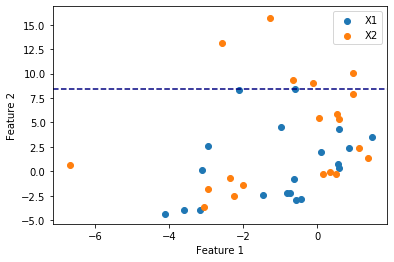

In [25]:
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X_ds2[y_ds2 == 0, 0], X_ds2[y_ds2 == 0, 1], label="X1")
plt.scatter(X_ds2[y_ds2 == 1, 0], X_ds2[y_ds2 == 1, 1], label="X2")
# 水平か垂直かは特徴量によって選択する
#plt.axvline(tree.threshold_, ls = "--", color = "magenta")
plt.axhline(tree.threshold_, ls = "--", color = "navy")
plt.legend()

以上